>#### Sentiment analysis of amazon reviews

## Group Member details

| Name | LinkedIn | GitHub |
| ----------- | ----------- |------------ |
| vikrant kulle | [LinkedIn](https://www.linkedin.com/in/vikrant-kulle-a422b7202/) | [GitHub](https://github.com/VIKRANT392000)  |

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priyank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Priyank\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time


class Scrapper:
    reviewlist = []
    def __init__(self, url):
        self.url = url
    
    def get_soup(self):
        r = requests.get(self.url)
        soup = BeautifulSoup(r.text, 'html.parser')
        return soup
    
    def get_reviews(self):
        soup = self.get_soup()
        reviews = soup.find_all('div', {'data-hook': 'review'})
        try:
            for item in reviews:
                review = {
                    'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                    'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                    'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
                    }
                Scrapper.reviewlist.append(review)
        except:
            pass

    def FinalDataFrame(self):
        for x in range(1,169):
            soup = self.get_soup()
            print(f'Getting page: {x}')
            self.get_reviews()
            print(len(Scrapper.reviewlist))
            if not soup.find('li', {'class': 'a-disabled a-last'}):
                pass
            else:
                break
        df = pd.DataFrame(Scrapper.reviewlist)
        return df 

url = "https://www.amazon.in/Alchemist-Paulo-Coelho/product-reviews/8172234988/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
sc = Scrapper(url)
df = sc.FinalDataFrame()
print(df)

Getting page: 1
10
Getting page: 2
20
Getting page: 3
30
Getting page: 4
30
Getting page: 5
40
Getting page: 6
50
Getting page: 7
60
Getting page: 8
60
Getting page: 9
60
Getting page: 10
70
Getting page: 11
80
Getting page: 12
90
Getting page: 13
100
Getting page: 14
110
Getting page: 15
120
Getting page: 16
130
Getting page: 17
140
Getting page: 18
150
Getting page: 19
160
Getting page: 20
170
Getting page: 21
170
Getting page: 22
180
Getting page: 23
190
Getting page: 24
200
Getting page: 25
210
Getting page: 26
220
Getting page: 27
220
Getting page: 28
230
Getting page: 29
240
Getting page: 30
250
Getting page: 31
260
Getting page: 32
270
Getting page: 33
280
Getting page: 34
290
Getting page: 35
300
Getting page: 36
310
Getting page: 37
320
Getting page: 38
320
Getting page: 39
330
Getting page: 40
340
Getting page: 41
350
Getting page: 42
360
Getting page: 43
370
Getting page: 44
380
Getting page: 45
390
Getting page: 46
400
Getting page: 47
410
Getting page: 48
420
Getting page:

In [3]:
df.head()

,title,rating,body
0,Honest Review,4.0,This is probably the most intresting book I've...
1,i love this book,5.0,There are too many things one can learn from “...
2,A Midas touch !,5.0,This book is not for you if you are looking fo...
3,Most Overhyped overrated Book on planet earth !,1.0,After seeing so many reviews i purchased this ...
4,Worst book!!,1.0,It's one of the worst book ever written don't ...


In [4]:
df.shape

(1390, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   1390 non-null   object 
 1   rating  1390 non-null   float64
 2   body    1390 non-null   object 
dtypes: float64(1), object(2)
memory usage: 32.7+ KB


In [6]:
df.drop_duplicates()

,title,rating,body
0,Honest Review,4.0,This is probably the most intresting book I've...
1,i love this book,5.0,There are too many things one can learn from “...
2,A Midas touch !,5.0,This book is not for you if you are looking fo...
3,Most Overhyped overrated Book on planet earth !,1.0,After seeing so many reviews i purchased this ...
4,Worst book!!,1.0,It's one of the worst book ever written don't ...
5,It sucks,1.0,Worst book i ever read. Its story about a boyh...
6,The lessons are good but the story sucks,3.0,"The philosophy was good ,the hurdles which eve..."
7,A magical book,5.0,The Alchemist by Paulo Coelho is the book whic...
8,Deceiving,1.0,Don’t fall for it. Just a fancy book and flatt...
9,Such a magical book that's why strongly recomm...,5.0,""" Reading the Alchemist was like getting up at..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   1390 non-null   object 
 1   rating  1390 non-null   float64
 2   body    1390 non-null   object 
dtypes: float64(1), object(2)
memory usage: 32.7+ KB


In [8]:
df.title.head()

0                                      Honest Review
1                                   i love this book
2                                   A Midas touch  !
3    Most Overhyped overrated Book on planet earth !
4                                       Worst book!!
Name: title, dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,1390.0,3.1,1.814489,1.0,1.0,3.5,5.0,5.0


In [10]:
df.body.head()

0    This is probably the most intresting book I've...
1    There are too many things one can learn from “...
2    This book is not for you if you are looking fo...
3    After seeing so many reviews i purchased this ...
4    It's one of the worst book ever written don't ...
Name: body, dtype: object

### Text Preprocessing

In [11]:
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word
# Lower casing and removing punctuations

df['body'] = df['body'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))


In [12]:
df['body'] = df['body'].str.replace('[^\w\s]', "")
df.body.head(5)

C:\Users\Priyank\AppData\Local\Temp\ipykernel_4100\4200118748.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['body'] = df['body'].str.replace('[^\w\s]', "")


0    this is probably the most intresting book ive ...
1    there are too many things one can learn from t...
2    this book is not for you if you are looking fo...
3    after seeing so many reviews i purchased this ...
4    its one of the worst book ever written dont fa...
Name: body, dtype: object

### Lemmatization

In [13]:

df['body'] = df['body'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.body.head()

0    this is probably the most intresting book ive ...
1    there are too many thing one can learn from th...
2    this book is not for you if you are looking fo...
3    after seeing so many review i purchased this b...
4    it one of the worst book ever written dont fal...
Name: body, dtype: object

### Look at the Summary Text using wordcloud

In [14]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [15]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [16]:
df.columns

Index(['title', 'rating', 'body'], dtype='object')

In [17]:
df.rating.value_counts()

5.0    556
1.0    556
4.0    139
3.0    139
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

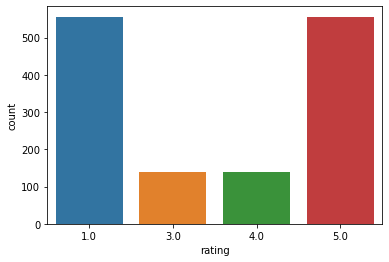

In [18]:
sns.countplot(data = df, x = 'rating')

In [19]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = df
# Dropping null values
reviews.dropna(inplace=True)

In [20]:
score_1 = reviews[reviews['rating'] == 1]
score_2 = reviews[reviews['rating'] == 2]
score_3 = reviews[reviews['rating'] == 3]
score_4 = reviews[reviews['rating'] == 4]
score_5 = reviews[reviews['rating'] == 5]

In [21]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

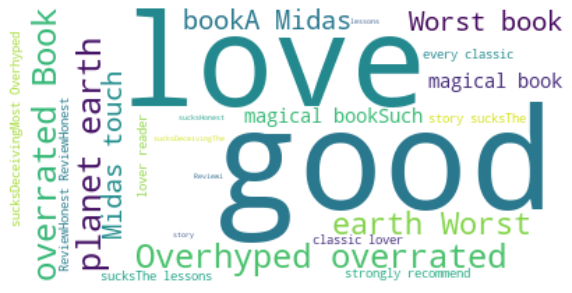

In [22]:
#Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.title.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews_sample[reviews_sample['rating'].isin([1,2]) ]
neutral_reviews = reviews_sample[reviews_sample['rating'].isin([3])]
positive_reviews = reviews_sample[reviews_sample['rating'].isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.title.str.cat()
neutral_reviews_str = neutral_reviews.title.str.cat()
positive_reviews_str = positive_reviews.title.str.cat()


### Create WordCloud

In [24]:
wordcloud_negative = WordCloud(colormap='Set3_r',stopwords=STOPWORDS).generate(negative_reviews_str)
wordcloud_neutral = WordCloud(colormap='coolwarm',stopwords=STOPWORDS).generate(neutral_reviews_str)
wordcloud_positive = WordCloud(colormap='Set1',stopwords=STOPWORDS).generate(positive_reviews_str)


Text(0.5, 1.0, 'Reviews with Negative Scores')

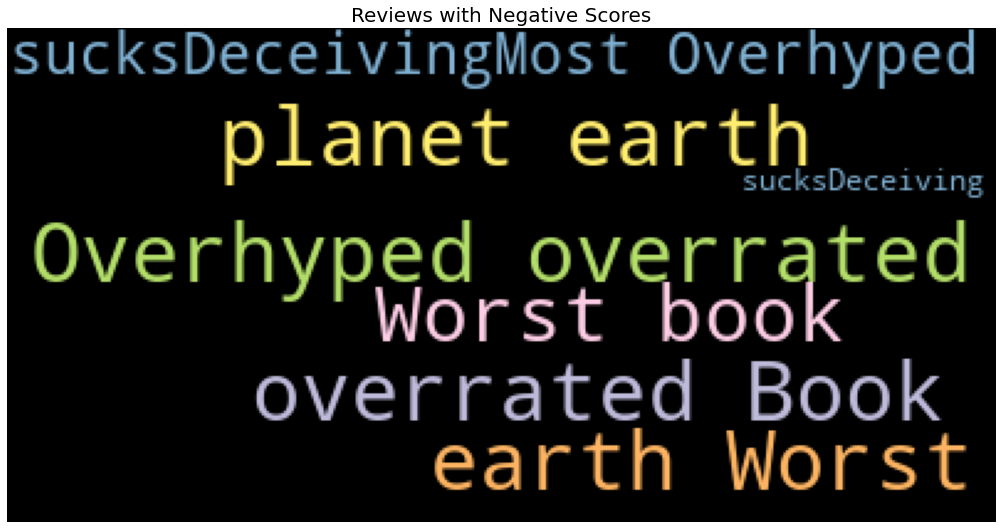

In [25]:
# Plot
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation=None)
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

Text(0.5, 1.0, 'Reviews with Neutral Scores')

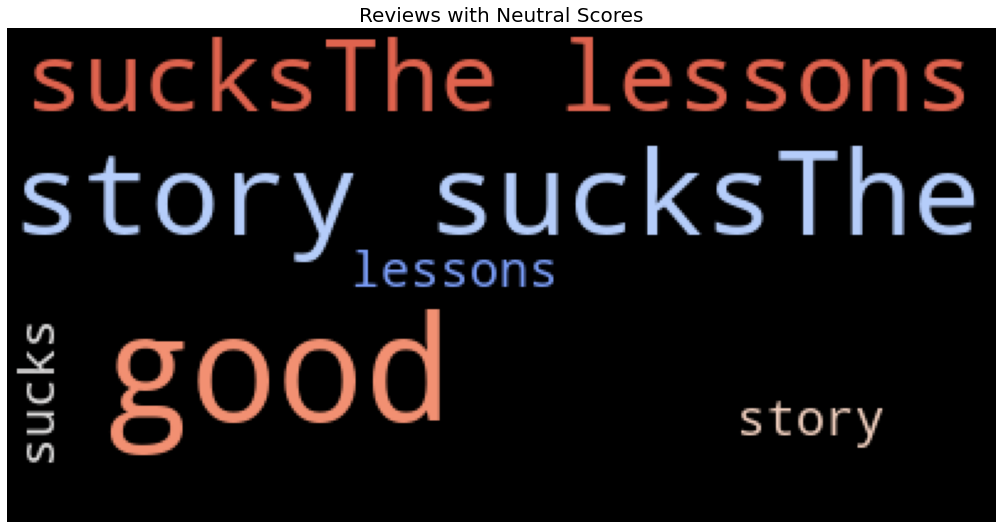

In [26]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_neutral,interpolation=None)
ax1.axis("off")
ax1.set_title('Reviews with Neutral Scores',fontsize=20)

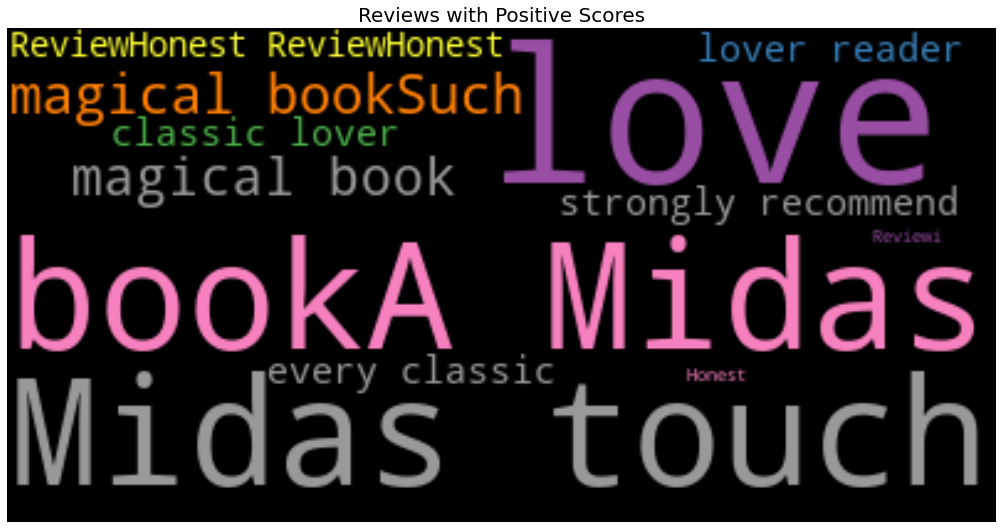

In [27]:
fig = plt.figure(figsize=(20,20))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

# Number of Words

In [28]:
#Number of Words in single tweet
df['word_count'] = df['body'].apply(lambda x: len(str(x).split(" ")))
df[['body','word_count']].head()

,body,word_count
0,this is probably the most intresting book ive ...,159
1,there are too many thing one can learn from th...,153
2,this book is not for you if you are looking fo...,241
3,after seeing so many review i purchased this b...,87
4,it one of the worst book ever written dont fal...,66


# Number of Characters

In [29]:
#Number of characters in single tweet
df['char_count'] = df['body'].str.len() ## this also includes spaces
df[['body','char_count']].head(10)

,body,char_count
0,this is probably the most intresting book ive ...,840
1,there are too many thing one can learn from th...,812
2,this book is not for you if you are looking fo...,1268
3,after seeing so many review i purchased this b...,481
4,it one of the worst book ever written dont fal...,353
5,worst book i ever read it story about a boyhad...,502
6,the philosophy wa good the hurdle which everyb...,785
7,the alchemist by paulo coelho is the book whic...,373
8,dont fall for it just a fancy book and flatter...,246
9,reading the alchemist wa like getting up at da...,1535


# Average Word Length

In [30]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['body'].apply(lambda x: avg_word(x))
df[['body','avg_word']].head(10)

,body,avg_word
0,this is probably the most intresting book ive ...,4.289308
1,there are too many thing one can learn from th...,4.313725
2,this book is not for you if you are looking fo...,4.265560
3,after seeing so many review i purchased this b...,4.540230
4,it one of the worst book ever written dont fal...,4.363636
5,worst book i ever read it story about a boyhad...,4.132653
6,the philosophy wa good the hurdle which everyb...,4.240000
7,the alchemist by paulo coelho is the book whic...,4.054054
8,dont fall for it just a fancy book and flatter...,4.369565
9,reading the alchemist wa like getting up at da...,4.389474


# Number of stopwords

In [31]:
stop = stopwords.words('english')

df['stopwords'] = df['body'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['body','stopwords']].head(10)

,body,stopwords
0,this is probably the most intresting book ive ...,80
1,there are too many thing one can learn from th...,88
2,this book is not for you if you are looking fo...,135
3,after seeing so many review i purchased this b...,41
4,it one of the worst book ever written dont fal...,29
5,worst book i ever read it story about a boyhad...,48
6,the philosophy wa good the hurdle which everyb...,86
7,the alchemist by paulo coelho is the book whic...,38
8,dont fall for it just a fancy book and flatter...,20
9,reading the alchemist wa like getting up at da...,135


# Number of Special Characters

In [32]:
df['hastags'] = df['body'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
df[['body','hastags']].head(10)

,body,hastags
0,this is probably the most intresting book ive ...,0
1,there are too many thing one can learn from th...,0
2,this book is not for you if you are looking fo...,0
3,after seeing so many review i purchased this b...,0
4,it one of the worst book ever written dont fal...,0
5,worst book i ever read it story about a boyhad...,0
6,the philosophy wa good the hurdle which everyb...,0
7,the alchemist by paulo coelho is the book whic...,0
8,dont fall for it just a fancy book and flatter...,0
9,reading the alchemist wa like getting up at da...,0


# Number of Numerics

In [33]:
df['numerics'] = df['body'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['body','numerics']].head()

,body,numerics
0,this is probably the most intresting book ive ...,1
1,there are too many thing one can learn from th...,0
2,this book is not for you if you are looking fo...,0
3,after seeing so many review i purchased this b...,0
4,it one of the worst book ever written dont fal...,1


# Number of Upper Case Words

In [34]:
df['upper'] = df['body'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['body','upper']].head(10)

,body,upper
0,this is probably the most intresting book ive ...,0
1,there are too many thing one can learn from th...,0
2,this book is not for you if you are looking fo...,0
3,after seeing so many review i purchased this b...,0
4,it one of the worst book ever written dont fal...,0
5,worst book i ever read it story about a boyhad...,0
6,the philosophy wa good the hurdle which everyb...,0
7,the alchemist by paulo coelho is the book whic...,0
8,dont fall for it just a fancy book and flatter...,0
9,reading the alchemist wa like getting up at da...,0


# Pre - Processing

# Lower Case

In [35]:
df['body'] = df['body'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['body'].head(10)

0    this is probably the most intresting book ive ...
1    there are too many thing one can learn from th...
2    this book is not for you if you are looking fo...
3    after seeing so many review i purchased this b...
4    it one of the worst book ever written dont fal...
5    worst book i ever read it story about a boyhad...
6    the philosophy wa good the hurdle which everyb...
7    the alchemist by paulo coelho is the book whic...
8    dont fall for it just a fancy book and flatter...
9    reading the alchemist wa like getting up at da...
Name: body, dtype: object

# Removing Punctuation

In [36]:
df['body'] = df['body'].str.replace('[^\w\s]','')
df['body'].head(10)

C:\Users\Priyank\AppData\Local\Temp\ipykernel_4100\3017645352.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['body'] = df['body'].str.replace('[^\w\s]','')


0    this is probably the most intresting book ive ...
1    there are too many thing one can learn from th...
2    this book is not for you if you are looking fo...
3    after seeing so many review i purchased this b...
4    it one of the worst book ever written dont fal...
5    worst book i ever read it story about a boyhad...
6    the philosophy wa good the hurdle which everyb...
7    the alchemist by paulo coelho is the book whic...
8    dont fall for it just a fancy book and flatter...
9    reading the alchemist wa like getting up at da...
Name: body, dtype: object

# Removal of Stop Words

In [37]:
stop = stopwords.words('english')
df['body'] = df['body'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['body'].head(10)

0    probably intresting book ive read far writing ...
1    many thing one learn alchemist following dream...
2    book looking way escape reality immersing juic...
3    seeing many review purchased booki wa reading ...
4    one worst book ever written dont fall positive...
5    worst book ever read story boyhad dream treasu...
6    philosophy wa good hurdle everybody encounter ...
7    alchemist paulo coelho book always go back dif...
8    dont fall fancy book flattering cover thousand...
9    reading alchemist wa like getting dawn seeing ...
Name: body, dtype: object

# Common word removal

In [38]:
freq = pd.Series(' '.join(df['body']).split()).value_counts()[:10]
freq

book         4170
dream        2363
story        2085
read         1668
boy           973
alchemist     973
treasure      973
one           973
go            834
follow        695
dtype: int64

In [39]:
freq = list(freq.index)
df['body'] = df['body'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['body'].head(10)

0    probably intresting ive far writing amazing ea...
1    many thing learn following taking risk followi...
2    looking way escape reality immersing juicy plo...
3    seeing many review purchased booki wa reading ...
4    worst ever written dont fall positive 5 star r...
5    worst ever boyhad went find help omen lol thou...
6    philosophy wa good hurdle everybody encounter ...
7    paulo coelho always back different take away w...
8    dont fall fancy flattering cover thousand five...
9    reading wa like getting dawn seeing sun rise r...
Name: body, dtype: object

# Rare Words Removal

In [40]:
freq = pd.Series(' '.join(df['body']).split()).value_counts()[-10:]
freq

uncanny         139
yourselfsuch    139
positivity      139
faith           139
sense           139
strong          139
instills        139
inspiration     139
bedrock         139
55              139
dtype: int64

In [41]:
freq = list(freq.index)
df['body'] = df['body'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['body'].head(10)

0    probably intresting ive far writing amazing ea...
1    many thing learn following taking risk followi...
2    looking way escape reality immersing juicy plo...
3    seeing many review purchased booki wa reading ...
4    worst ever written dont fall positive 5 star r...
5    worst ever boyhad went find help omen lol thou...
6    philosophy wa good hurdle everybody encounter ...
7    paulo coelho always back different take away w...
8    dont fall fancy flattering cover thousand five...
9    reading wa like getting dawn seeing sun rise r...
Name: body, dtype: object

# Spelling correction

In [42]:
df['body'][:10].apply(lambda x: str(TextBlob(x).correct()))

0    probably interesting give far writing amazing ...
1    many thing learn following taking risk followi...
2    looking way escape reality immersing juice plo...
3    seeing many review purchased book wa reading w...
4    worst ever written dont fall positive 5 star r...
5    worst ever boyhood went find help omen ll thou...
6    philosophy wa good hardly everybody encounter ...
7    paul coelho always back different take away wh...
8    dont fall fancy flattering cover thousand five...
9    reading wa like getting dawn seeing sun rise r...
Name: body, dtype: object

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Priyank\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Tokenization

In [45]:
TextBlob(df['body'][1]).words

WordList(['many', 'thing', 'learn', 'following', 'taking', 'risk', 'following', 'actually', 'difficult', 'people', 'world', 'actually', 'mean', 'risk', 'heart', 'beauty', 'author', 'right', 'saying', 'u', 'decide', 'entire', 'universe', 'conspires', 'favour', 'called', 'beginner', 'luck', 'witness', 'beginner', 'luck', 'point', 'livesalso', 'talk', 'stage', 'journey', 'towards', 'realizing', 'everything', 'haywire', 'everything', 'working', 'u', 'almost', 'take', 'u', 'brink', 'abandoning', 'everything', 'getting', 'back', 'wa', 'familiar', 'comfortable'])

In [46]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priyank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Stemming

In [47]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['body'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    probabl intrest ive far write amaz easili unde...
1    mani thing learn follow take risk follow actua...
2    look way escap realiti immers juici plot week ...
3    see mani review purchas booki wa read wait som...
4    worst ever written dont fall posit 5 star rate...
5    worst ever boyhad went find help omen lol thou...
6    philosophi wa good hurdl everybodi encount way...
7    paulo coelho alway back differ take away whene...
8    dont fall fanci flatter cover thousand five st...
9    read wa like get dawn see sun rise rest world ...
Name: body, dtype: object

# Advanced Text Processing

# N-grams

In [48]:
TextBlob(df['body'][10]).ngrams(2)

[WordList(['probably', 'intresting']),
 WordList(['intresting', 'ive']),
 WordList(['ive', 'far']),
 WordList(['far', 'writing']),
 WordList(['writing', 'amazing']),
 WordList(['amazing', 'easily']),
 WordList(['easily', 'understand']),
 WordList(['understand', 'first']),
 WordList(['first', 'time']),
 WordList(['time', 'reader']),
 WordList(['reader', 'would']),
 WordList(['would', 'definitely']),
 WordList(['definitely', 'recommend']),
 WordList(['recommend', 'wa']),
 WordList(['wa', 'originally']),
 WordList(['originally', 'written']),
 WordList(['written', 'portuguese']),
 WordList(['portuguese', 'later']),
 WordList(['later', 'translated']),
 WordList(['translated', 'englishthe']),
 WordList(['englishthe', 'andalsuia']),
 WordList(['andalsuia', 'adventure']),
 WordList(['adventure', 'african']),
 WordList(['african', 'desert']),
 WordList(['desert', 'find']),
 WordList(['find', 'pyramid']),
 WordList(['pyramid', 'egypt']),
 WordList(['egypt', 'easily']),
 WordList(['easily', 'rela

# Term frequency

In [49]:
tf1 = (df['body'][1:3]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,u,4.0
1,everything,3.0
2,luck,2.0
3,beginner,2.0
4,following,2.0
...,...,...
109,named,1.0
110,andulasia,1.0
111,way,1.0
112,upon,1.0


# Inverse Document Frequency

In [50]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['body'].str.contains(word)])))

tf1

,words,tf,idf
0,u,4.0,0.000000
1,everything,3.0,1.609438
2,luck,2.0,2.302585
3,beginner,2.0,2.302585
4,following,2.0,1.609438
...,...,...,...
109,named,1.0,1.609438
110,andulasia,1.0,2.302585
111,way,1.0,0.510826
112,upon,1.0,2.302585


# Term Frequency – Inverse Document Frequency (TF-IDF)

In [51]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,u,4.0,0.000000,0.000000
1,everything,3.0,1.609438,4.828314
2,luck,2.0,2.302585,4.605170
3,beginner,2.0,2.302585,4.605170
4,following,2.0,1.609438,3.218876
...,...,...,...,...
109,named,1.0,1.609438,1.609438
110,andulasia,1.0,2.302585,2.302585
111,way,1.0,0.510826,0.510826
112,upon,1.0,2.302585,2.302585


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(df['body'])
vect

<1390x326 sparse matrix of type '<class 'numpy.float64'>'
	with 59214 stored elements in Compressed Sparse Row format>

# Bag of Words

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
df_bow = bow.fit_transform(df['body'])
df_bow

<1390x363 sparse matrix of type '<class 'numpy.int64'>'
	with 66720 stored elements in Compressed Sparse Row format>

# Stopwords

Stopwords are the words in any language which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence.

In [54]:
sw = stopwords.words('english')
sw[0:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

# Sentiment Analysis

In [55]:
df['body'][:10].apply(lambda x: TextBlob(x).sentiment)

0       (0.2685897435897436, 0.5384615384615384)
1     (0.07482142857142857, 0.48482142857142857)
2    (0.015000000000000008, 0.46071428571428574)
3                                  (0.35, 0.525)
4     (-0.19378787878787876, 0.6086868686868686)
5                (-0.07430555555555553, 0.68125)
6                (-0.09375000000000003, 0.45625)
7                   (-0.07916666666666668, 0.25)
8                                 (-0.0625, 0.8)
9         (0.3493801652892562, 0.62242883379247)
Name: body, dtype: object

In [56]:
df['sentiment'] = df['body'].apply(lambda x: TextBlob(x).sentiment[0] )
df[['body','sentiment']].head(10)

,body,sentiment
0,probably intresting ive far writing amazing ea...,0.268590
1,many thing learn following taking risk followi...,0.074821
2,looking way escape reality immersing juicy plo...,0.015000
3,seeing many review purchased booki wa reading ...,0.350000
4,worst ever written dont fall positive 5 star r...,-0.193788
5,worst ever boyhad went find help omen lol thou...,-0.074306
6,philosophy wa good hurdle everybody encounter ...,-0.093750
7,paulo coelho always back different take away w...,-0.079167
8,dont fall fancy flattering cover thousand five...,-0.062500
9,reading wa like getting dawn seeing sun rise r...,0.349380


### Sentiment Score

### Install vaderSentiment

In [57]:
%pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [58]:
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [59]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['body']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.076,0.579,0.345,0.9672
1,0.127,0.599,0.275,0.9169
2,0.075,0.682,0.243,0.9136
3,0.000,0.899,0.101,0.4215
4,0.271,0.601,0.128,-0.7729


In [60]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)


,title,rating,body,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,sentiment,neg,neu,pos,compound
0,Honest Review,4.0,probably intresting ive far writing amazing ea...,159,840,4.289308,80,0,1,0,0.268590,0.076,0.579,0.345,0.9672
1,i love this book,5.0,many thing learn following taking risk followi...,153,812,4.313725,88,0,0,0,0.074821,0.127,0.599,0.275,0.9169
2,A Midas touch !,5.0,looking way escape reality immersing juicy plo...,241,1268,4.265560,135,0,0,0,0.015000,0.075,0.682,0.243,0.9136


In [61]:
# if df_c['sentiment'] = np.where(df_c.compound >= 0.66 , 'Positive', df_c.compound)
# df_c

In [62]:
# Convert scores into positive, negetive and neutral sentiments using some threshold
def categorise(df_c):  
    if df_c['compound'] > -1 and df_c['compound'] <= -0.34:
        return 'Negative'
    elif df_c['compound'] > -0.34 and df_c['compound'] <= 0.32:
        return 'Neutral'
    elif df_c['compound'] > 0.32  and df_c['compound'] <= 1:
        return 'Positive'
    return 'Positive'

In [63]:
df_c['sentiment'] = df_c.apply(lambda df_c: categorise(df_c), axis=1)
df_c

,title,rating,body,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,sentiment,neg,neu,pos,compound
0,Honest Review,4.0,probably intresting ive far writing amazing ea...,159,840,4.289308,80,0,1,0,Positive,0.076,0.579,0.345,0.9672
1,i love this book,5.0,many thing learn following taking risk followi...,153,812,4.313725,88,0,0,0,Positive,0.127,0.599,0.275,0.9169
2,A Midas touch !,5.0,looking way escape reality immersing juicy plo...,241,1268,4.265560,135,0,0,0,Positive,0.075,0.682,0.243,0.9136
3,Most Overhyped overrated Book on planet earth !,1.0,seeing many review purchased booki wa reading ...,87,481,4.540230,41,0,0,0,Positive,0.000,0.899,0.101,0.4215
4,Worst book!!,1.0,worst ever written dont fall positive 5 star r...,66,353,4.363636,29,0,1,0,Negative,0.271,0.601,0.128,-0.7729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,It sucks,1.0,worst ever boyhad went find help omen lol thou...,98,502,4.132653,48,0,1,0,Positive,0.131,0.626,0.242,0.5122
1386,The lessons are good but the story sucks,3.0,philosophy wa good hurdle everybody encounter ...,150,785,4.240000,86,0,0,0,Positive,0.130,0.614,0.256,0.8402
1387,A magical book,5.0,paulo coelho always back different take away w...,74,373,4.054054,38,0,0,0,Negative,0.233,0.634,0.133,-0.5423
1388,Deceiving,1.0,dont fall fancy flattering cover thousand five...,46,246,4.369565,20,0,0,0,Positive,0.159,0.616,0.225,0.4435


### Result

<AxesSubplot:>

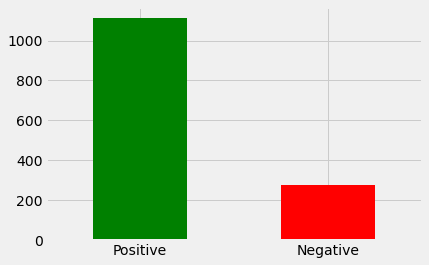

In [64]:
result=df_c['sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['green','red','lightgreen'])